#### Vemos que hay adentro del file de los subhalos (AHF)

In [11]:
import numpy as np
path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/AHF_output_2x2.5Mpc/'
data = np.loadtxt(path + 'HESTIA_100Mpc_8192_17_11.127.z0.000.AHF_halos')

In [12]:
ID   = data[:,0]
HostHalo = data[:,1] ## si es 0 son centrales
Mvir = data[:,3]
Xc   = data[:,5]
Yc   = data[:,6]
Zc   = data[:,7]
Rvir = data[:,11]
fMhires = data[:,37]


#### Saco los halos con particulas low-res usando fMhires

In [13]:
hires = np.where((fMhires > 0.9999) & (HostHalo == 0))
IDs   = ID[hires]
M_vir = Mvir[hires]
X_c   = Xc[hires]
Y_c   = Yc[hires]
Z_c   = Zc[hires]
R_vir = Rvir[hires]

#### Ordenamos los halos por masa

In [14]:
mask = np.argsort(M_vir)

MVir = M_vir[mask][::-1]/0.6777
RVir = R_vir[mask][::-1]/0.6777
Id   = IDs[mask][::-1]

print (MVir[:20])
print (RVir[:20])
print (np.int_(Id[:20]))

[2.29918843e+12 1.95943633e+12 8.10205106e+11 3.44978604e+11
 2.72149919e+11 2.43258079e+11 2.13957503e+11 2.11714623e+11
 1.58559835e+11 9.66278589e+10 9.45881659e+10 9.10994540e+10
 6.02133687e+10 5.39456987e+10 4.25223550e+10 4.20640401e+10
 4.17712852e+10 3.65272244e+10 3.64718902e+10 3.23138557e+10]
[278.19093994 263.75977571 196.48812159 147.82352073 136.59436329
 131.57739413 126.05872805 125.6160543  114.07702523  96.72421425
  96.03069205  94.83547292  82.61767744  79.63700753  73.57237716
  73.30677291  73.12970341  69.94245241  69.89818504  67.138852  ]
[127000000000002 127000000000003 127000000000004 127000000000006
 127000000000007 127000000000009 127000000000012 127000000000011
 127000000000014 127000000000020 127000000000021 127000000000023
 127000000000028 127000000000031 127000000000034 127000000000036
 127000000000033 127000000000040 127000000000042 127000000000046]


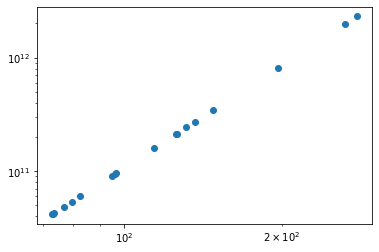

In [32]:
import matplotlib.pyplot as plt
plt.plot(RVir[:18],MVir[:18],'.',ms=12)
plt.xscale('log')
plt.yscale('log')

In [6]:
#Posicion de los 15 halos mas masivos
Xcen = X_c[mask][::-1]
Ycen = Y_c[mask][::-1]
Zcen = Z_c[mask][::-1]

for i in range(18):
    print(Xcen[i], Ycen[i], Zcen[i])

48815.20492896 46704.51456574 53605.06512751
48715.76343264 47062.33186381 53337.18771026
47528.53143113 46364.79937322 54832.87761443
47325.20751091 47259.17534091 51913.26007243
47791.49185715 47557.42127309 53326.98480339
47410.10865371 48306.71961378 52663.08565861
48525.13330323 48033.88380274 51995.50511886
49867.09680627 47254.19241278 52225.40730063
47561.26010234 48625.1724068 52287.72537057
46458.47234898 47038.59782415 54253.78933712
50239.70580101 47231.39512539 51973.30641747
47334.10674891 47703.5296049 52309.65742962
49552.12076505 46889.95957375 53629.05422846
48990.8772333 45293.69230846 54012.69209811
48919.04555261 46710.9464854 53675.87015033
49667.83816267 46570.79239488 53785.88731195
49245.99428972 47650.64537525 52801.10319455
49444.40441095 47242.71113079 52735.41688301


#### Guardo las posiciones en un array

In [47]:
Hpos = np.array([Xcen, Ycen, Zcen])
HPos = Hpos.T
np.shape(HPos)

(92257, 3)

#### Guardo los halos en un archivo *my_halos.dat* 
Estos no tienen part low res

In [36]:
data = np.ndarray([len(Xcen),6])
data[:,0]= Id
data[:,1]= MVir
data[:,2]= RVir
data[:,3]= Xcen
data[:,4]= Ycen
data[:,5]= Zcen
np.savetxt('../_data/my_halos.dat', data, 
           fmt=('%d', '%12.6f','%12.6f','%12.6f','%12.6f','%12.6f'))

### Leo las posiciones de las particulas y los demas datos

In [7]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

StrPos  = []
StrMass = []
StrVel  = []
StrID   = []
StrMet  = []
StrTMet = []
StrBDen = []
StrBPos = []
StrBVel = []
StrSFT  = []
StrPot  = []

GasPos  = []
GasMass = []
GasVel  = []
GasID   = []
GasMet  = []
GasTMet = []
GasPot  = []

DrkPos  = []
DrkMass = []
DrkVel  = []
DrkID   = []
DrkPot  = []

# Ty2Pos  = []
# Ty2Mass = []

# Ty3Pos  = []
# Ty3Mass = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    #stars
    pos_str    = snap['PartType4/Coordinates'][()]
    mass_str   = snap['PartType4/Masses'][()]
    vel_str    = snap['PartType4/Velocities'][()]
    ID_str     = snap['PartType4/ParticleIDs'][()]
    metal_str  = snap['PartType4/GFM_Metals'][()]
    totmet_str = snap['PartType4/GFM_Metallicity'][()]
    bden_str   = snap['PartType4/BirthDensity'][()]
    bpos_str   = snap['PartType4/BirthPos'][()]
    bvel_str   = snap['PartType4/BirthVel'][()]
    bSFT_str   = snap['PartType4/GFM_StellarFormationTime'][()]
    pot_str    = snap['PartType4/Potential'][()]
    
    StrPos.append(pos_str)
    StrMass.append(mass_str)
    StrVel.append(vel_str)
    StrID.append(ID_str)
    StrMet.append(metal_str)
    StrTMet.append(totmet_str)
    StrBDen.append(bden_str)
    StrBPos.append(bpos_str)
    StrBVel.append(bvel_str)
    StrSFT.append(bSFT_str)
    StrPot.append(pot_str)

    #gas
    pos_gas    = snap['PartType0/Coordinates'][()]
    mass_gas   = snap['PartType0/Masses'][()]
    vel_gas    = snap['PartType0/Velocities'][()]
    ID_gas     = snap['PartType0/ParticleIDs'][()]
    metal_gas  = snap['PartType0/GFM_Metals'][()]
    totmet_gas = snap['PartType0/GFM_Metallicity'][()]
    pot_gas    = snap['PartType0/Potential'][()]
    
    GasPos.append(pos_gas)
    GasMass.append(mass_gas)
    GasVel.append(vel_gas)
    GasID.append(ID_gas)
    GasMet.append(metal_gas)
    GasTMet.append(totmet_gas)
    GasPot.append(pot_gas)

    #dark matter
    pos_drk    = snap['PartType1/Coordinates'][()]
    mass_drk   = snap['PartType1/Masses'][()]
    vel_drk    = snap['PartType1/Velocities'][()]
    ID_drk     = snap['PartType1/ParticleIDs'][()]
    pot_drk    = snap['PartType1/Potential'][()]
    
    DrkPos.append(pos_drk)
    DrkMass.append(mass_drk)
    DrkVel.append(vel_drk)
    DrkID.append(ID_drk)
    DrkPot.append(pot_drk)

#     #type2
#     pos_ty2  = snap['PartType2/Coordinates'][()]
#     mass_ty2 = snap['PartType2/Masses'][()]
    
#     Ty2Pos.append(pos_ty2)
#     Ty2Mass.append(mass_ty2)

#     #type3
#     pos_ty3  = snap['PartType3/Coordinates'][()]
#     mass_ty3 = snap['PartType3/Masses'][()]
    
#     Ty3Pos.append(pos_ty3)
#     Ty3Mass.append(mass_ty3)
    
a = snap.get('Header').attrs['Time']
h = snap.get('Header').attrs['HubbleParam']

Omega0   = snap.get('Header').attrs['Omega0']
Omegab   = snap.get('Header').attrs['OmegaBaryon']
OmegaL   = snap.get('Header').attrs['OmegaLambda']
Redshift = snap.get('Header').attrs['Redshift']

Unit_Length = snap.get('Header').attrs['UnitLength_in_cm']
Unit_Mass   = snap.get('Header').attrs['UnitMass_in_g']
Unit_Veloc  = snap.get('Header').attrs['UnitVelocity_in_cm_per_s']

StrPos  = np.concatenate(StrPos)
StrMass = np.concatenate(StrMass)
StrVel  = np.concatenate(StrVel)
StrID   = np.concatenate(StrID)
StrMet  = np.concatenate(StrMet)
StrTMet = np.concatenate(StrTMet)
StrBDen = np.concatenate(StrBDen)
StrBPos = np.concatenate(StrBPos)
StrBVel = np.concatenate(StrBVel)
StrSFT  = np.concatenate(StrSFT)
StrPot  = np.concatenate(StrPot)

GasPos  = np.concatenate(GasPos)
GasMass = np.concatenate(GasMass)
GasVel  = np.concatenate(GasVel)
GasID   = np.concatenate(GasID)
GasMet  = np.concatenate(GasMet)
GasTMet = np.concatenate(GasTMet)
GasPot  = np.concatenate(GasPot)

DrkPos  = np.concatenate(DrkPos)
DrkMass = np.concatenate(DrkMass)
DrkVel  = np.concatenate(DrkVel)
DrkID   = np.concatenate(DrkID)
DrkPot  = np.concatenate(DrkPot)

# Ty2Pos  = np.concatenate(Ty2Pos)
# Ty2Mass = np.concatenate(Ty2Mass)

# Ty3Pos  = np.concatenate(Ty3Pos)
# Ty3Mass = np.concatenate(Ty3Mass)

gc.collect()

CPU times: user 18.6 s, sys: 2min 12s, total: 2min 31s
Wall time: 2min 34s


0

#### Unidades

In [39]:
print('Unit_Length=', Unit_Length) #---> Esto es en cm y equivale a 1Mpc
print('Unit_Mass=', Unit_Mass)  # ---> Esto es en g y equivale a 1e10Msol
print('Unit_Veloc=', Unit_Veloc)# ---> Esto es cm/s y equivale a 1km/s

Unit_Length= 3.085678e+24
Unit_Mass= 1.989e+43
Unit_Veloc= 100000.0


### Guardo los 15 halos mas masivos dentro de 2Rvir

In [40]:
for i in range(18):
    print ('subhalo=',str('%d'%Id[i]))

subhalo= 127000000000002
subhalo= 127000000000003
subhalo= 127000000000004
subhalo= 127000000000006
subhalo= 127000000000007
subhalo= 127000000000009
subhalo= 127000000000012
subhalo= 127000000000011
subhalo= 127000000000014
subhalo= 127000000000020
subhalo= 127000000000021
subhalo= 127000000000023
subhalo= 127000000000028
subhalo= 127000000000031
subhalo= 127000000000030
subhalo= 127000000000034
subhalo= 127000000000036
subhalo= 127000000000033


In [36]:
for i in range(18):
    print ('subhalo=',str('%d'%Id[i]))
    
    SPos = StrPos*1000 - HPos[i]
    xstr = SPos[:,0]*a/h
    ystr = SPos[:,1]*a/h
    zstr = SPos[:,2]*a/h
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    kstr, = np.where(rstr < 2*RVir[i]*a/h)
    
    GPos = GasPos*1000 - HPos[i]
    xgas = GPos[:,0]*a/h
    ygas = GPos[:,1]*a/h
    zgas = GPos[:,2]*a/h
    rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
    kgas,= np.where(rgas < 2*RVir[i]*a/h)
    
    DPos = DrkPos*1000 - HPos[i]
    xdrk = DPos[:,0]*a/h
    ydrk = DPos[:,1]*a/h
    zdrk = DPos[:,2]*a/h
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    kdrk,= np.where(rdrk < 2*RVir[i]*a/h)
    
#     T2Pos = (Ty2Pos - H_pos[j,:])*1000
#     xty2 = T2Pos[:,0]
#     yty2 = T2Pos[:,1]
#     zty2 = T2Pos[:,2]
#     rty2 = np.sqrt(xty2**2 + yty2**2 + zty2**2)
#     kty2,= np.where(rty2 < 200)
#     print ('Number of PartType2=', len(kty2))
    
#     T3Pos = (Ty3Pos - H_pos[j,:])*1000
#     xty3 = T3Pos[:,0]
#     yty3 = T3Pos[:,1]
#     zty3 = T3Pos[:,2]
#     rty3 = np.sqrt(xty3**2 + yty3**2 + zty3**2)
#     kty3,= np.where(rty3 < 200)
#     print ('Number of PartType3=', len(kty3))

#     if not (np.size(kty2)>0 and np.size(kty3)>0):
    output_file = h5py.File('/z/omarioni/gradients/_simulations/snap_127/subhalo_'+str('%d'%Id[i])+'.h5py', 'a')

    output_file.create_dataset('/Time',          data = a)
    output_file.create_dataset('/h',             data = h)
    output_file.create_dataset('/Omega_0',       data = Omega0)
    output_file.create_dataset('/Omega_Baryon',  data = Omegab)
    output_file.create_dataset('/Omega_Lambda',  data = OmegaL)
    output_file.create_dataset('/Redshift',      data = Redshift)
    output_file.create_dataset('/Center',        data = HPos[i])
    output_file.create_dataset('/M200'       ,   data = MVir[i])
    output_file.create_dataset('/R200'       ,   data = RVir[i])
    
    i = i+1
    
    output_file.create_dataset('/Str/Coordinates',      data = SPos[kstr,:],   dtype=np.float32)
    output_file.create_dataset('/Str/Masses',           data = StrMass[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Velocities',       data = StrVel[kstr,:], dtype=np.float32)
    output_file.create_dataset('/Str/IDs',              data = StrID[kstr])
    output_file.create_dataset('/Str/Metallicity',      data = StrMet[kstr],   dtype=np.float32)
    output_file.create_dataset('/Str/Total_Metallicity',data = StrTMet[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Density',    data = StrBDen[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Position',   data = StrBPos[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Velocities', data = StrBVel[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/FormationTime',    data = StrSFT[kstr],   dtype=np.float32)
    output_file.create_dataset('/Str/Potential',        data = StrPot[kstr],   dtype=np.float32)


    output_file.create_dataset('/Gas/Coordinates',      data = GPos[kgas,:],   dtype=np.float32)
    output_file.create_dataset('/Gas/Masses',           data = GasMass[kgas],  dtype=np.float32)
    output_file.create_dataset('/Gas/Velocities',       data = GasVel[kgas,:], dtype=np.float32)
    output_file.create_dataset('/Gas/IDs',              data = GasID[kgas])
    output_file.create_dataset('/Gas/Metallicity',      data = GasMet[kgas],   dtype=np.float32)
    output_file.create_dataset('/Gas/Total_Metallicity',data = GasTMet[kgas],  dtype=np.float32)
    output_file.create_dataset('/Gas/Potential',        data = GasPot[kgas],   dtype=np.float32)


    output_file.create_dataset('/Drk/Coordinates',      data = DPos[kdrk,:],   dtype=np.float32)
    output_file.create_dataset('/Drk/Masses',           data = DrkMass[kdrk],  dtype=np.float32)
    output_file.create_dataset('/Drk/Velocities',       data = DrkVel[kdrk,:], dtype=np.float32)
    output_file.create_dataset('/Drk/IDs',              data = DrkID[kdrk])
    output_file.create_dataset('/Drk/Potential',        data = DrkPot[kdrk],   dtype=np.float32)


    output_file.close()

subhalo= 127000000000002
subhalo= 127000000000003
subhalo= 127000000000004
subhalo= 127000000000006
subhalo= 127000000000007
subhalo= 127000000000009
subhalo= 127000000000012
subhalo= 127000000000011
subhalo= 127000000000014
subhalo= 127000000000020
subhalo= 127000000000021
subhalo= 127000000000023
subhalo= 127000000000028
subhalo= 127000000000031
subhalo= 127000000000030


### Pruebo los archivos que acabo de guardar
#### Grafico con density plots los 3 halos mas masivos

subhalo_127000000000002


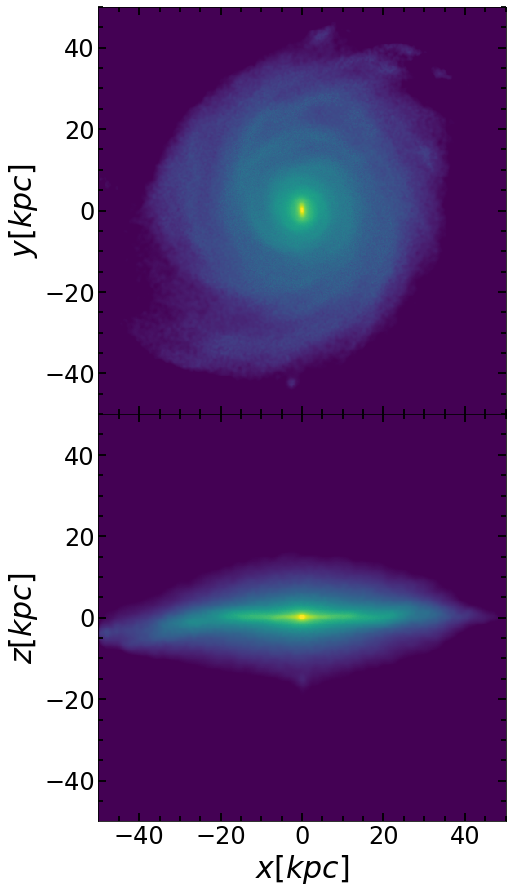

subhalo_127000000000003


<Figure size 432x288 with 0 Axes>

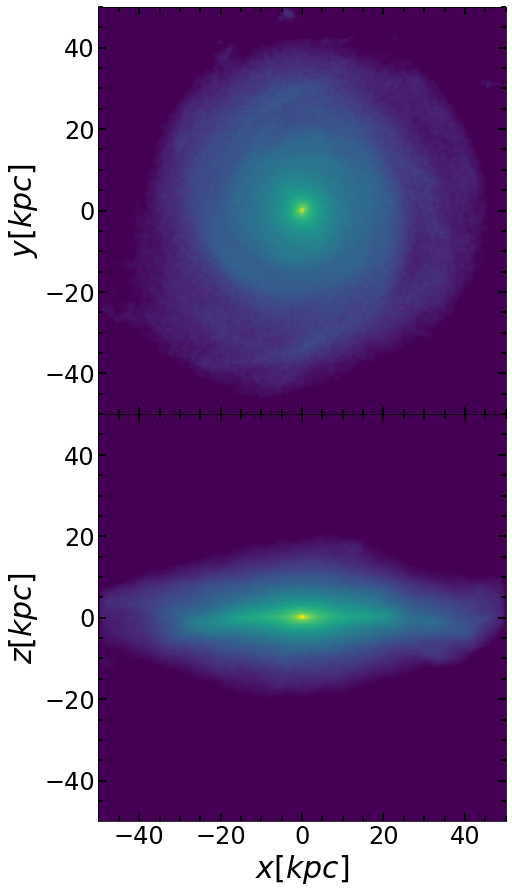

subhalo_127000000000004


<Figure size 432x288 with 0 Axes>

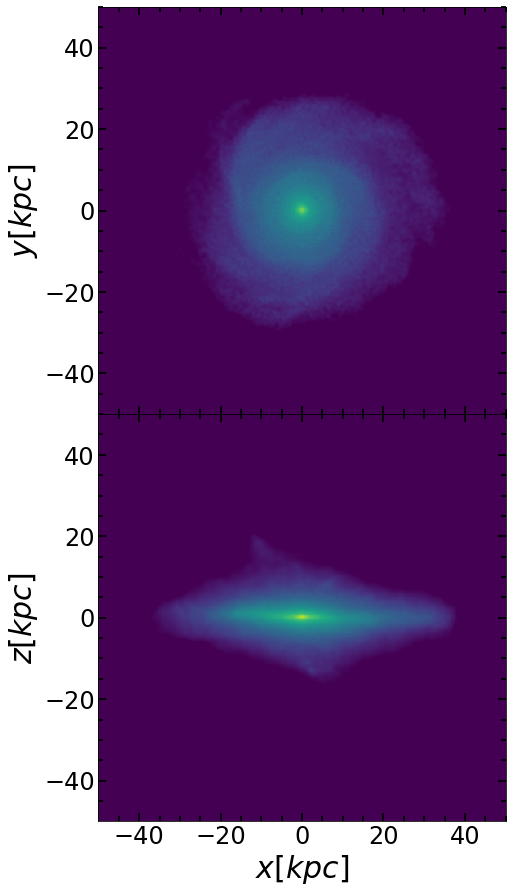

<Figure size 432x288 with 0 Axes>

In [15]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np
import matplotlib.pyplot as plt

# vector = (0,1,3)

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '../_simulations/snap_127/'

for i in range(0,3):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[i])+'.h5py', 'r')
    
    print('subhalo_'+str('%d'%Id[i]))
    
    cm   = snap['/Center'][()]
    aexp = snap['/Time'][()]
    h    = snap['/h'][()]

    pstr = snap['/Str/Coordinates'][()]
    masa_str = snap['/Str/Masses'][()]
    vel  = snap['/Str/Velocities'][()]

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0])*aexp/h
    ystr = (pstr[:,1])*aexp/h
    zstr = (pstr[:,2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp)
    v_y = vel[:,1] *np.sqrt(aexp)
    v_z = vel[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
    mstr = masa_str*1e10/h


    veloc,=np.where(r<3)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([np.size(xn),3])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn

#---------------------generador del gráfico-----------------
    rl=50   
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
    vmin=6.3
    vmax=9.8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

#-----grafico-----------
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 13))
    fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

    particles=sph.Particles(pos[corte,:],mstr[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend1=sph.Render(escena)
    extent=escena.get_extent()
    rend1.set_logscale()

    ax[0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    #ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
    ax[0].set_xticklabels([])
    #plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    ax[0].set_ylabel('$y[kpc]$', fontsize=30)
    ax[0].minorticks_on()
    ax[0].tick_params( labelsize=24)
    ax[0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax[0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

    particles=sph.Particles(pos[corte,:],mstr[corte],nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    ax[1].set_xlabel('$x[kpc]$', fontsize=30)
    ax[1].set_ylabel('$z[kpc]$', fontsize=30)
    ax[1].minorticks_on()
    ax[1].tick_params( labelsize=24)
    ax[1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax[1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
    
    plt.show()
    plt.clf()


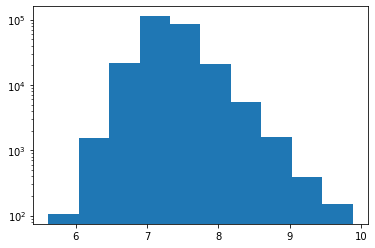

In [53]:
rend1.histogram(log=True)

#### Grafico las estrellas de los subhalos 

subhalo_127000000000002


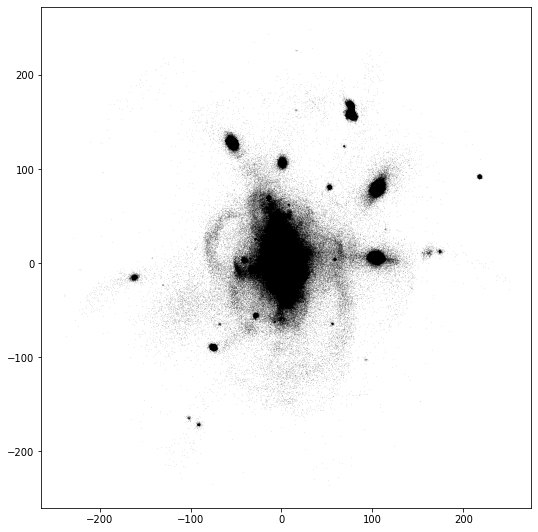

subhalo_127000000000003


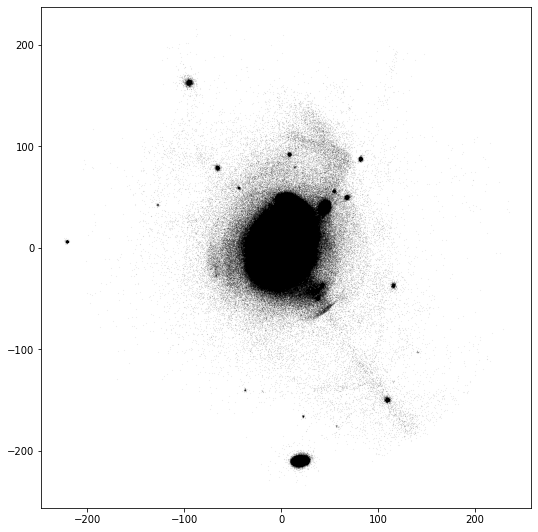

subhalo_127000000000004


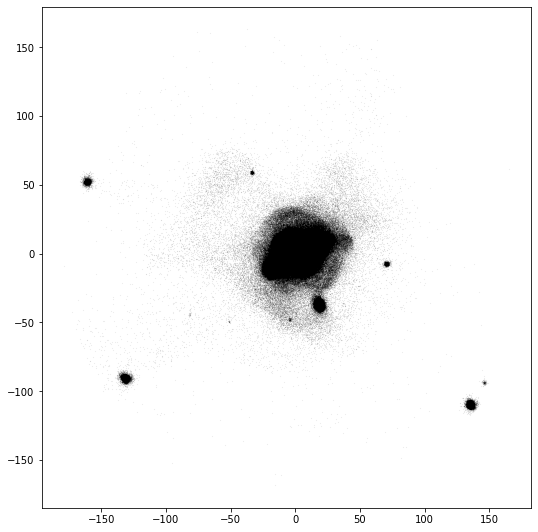

subhalo_127000000000006


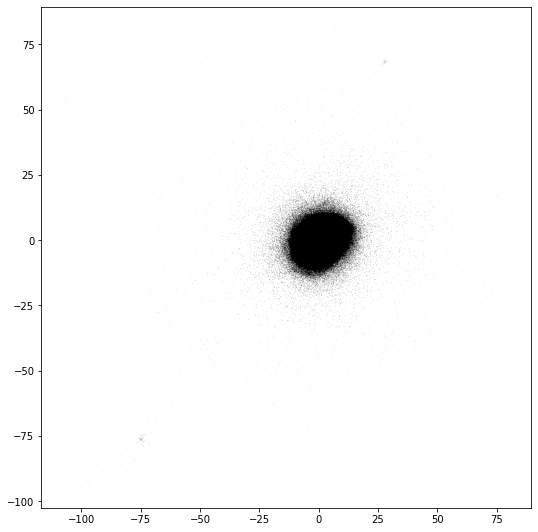

subhalo_127000000000007


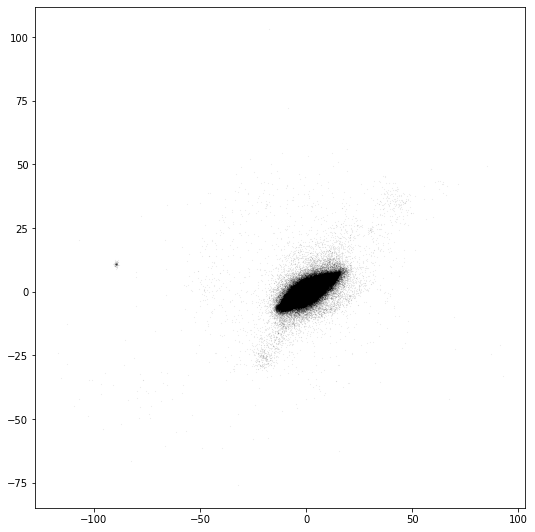

subhalo_127000000000009


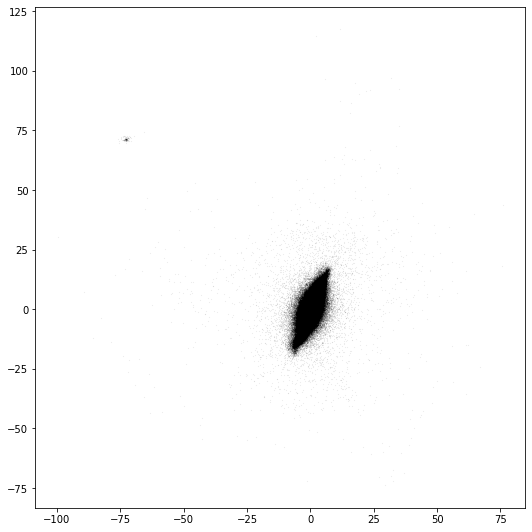

subhalo_127000000000012


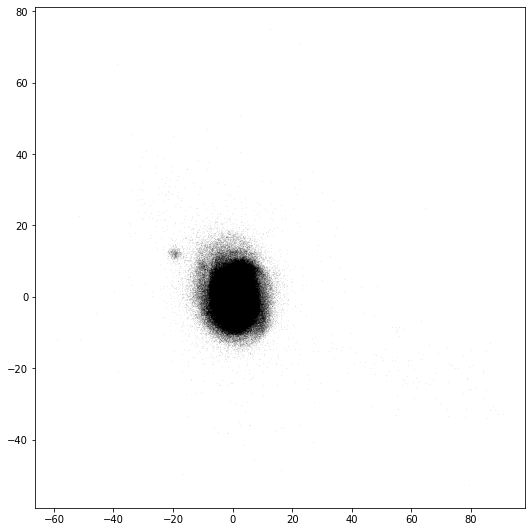

subhalo_127000000000011


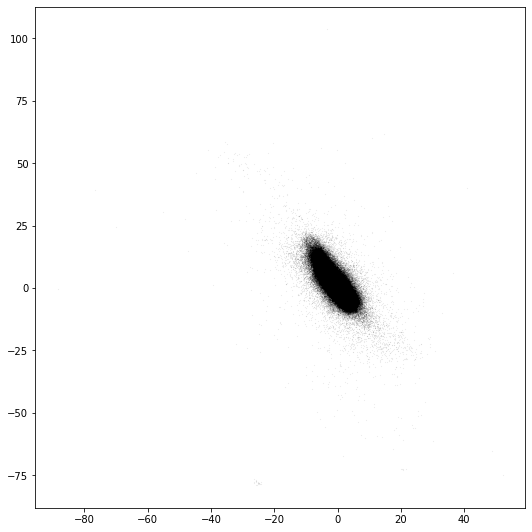

subhalo_127000000000014


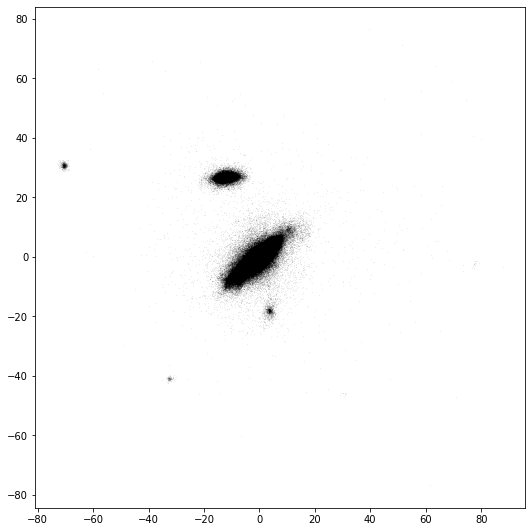

subhalo_127000000000020


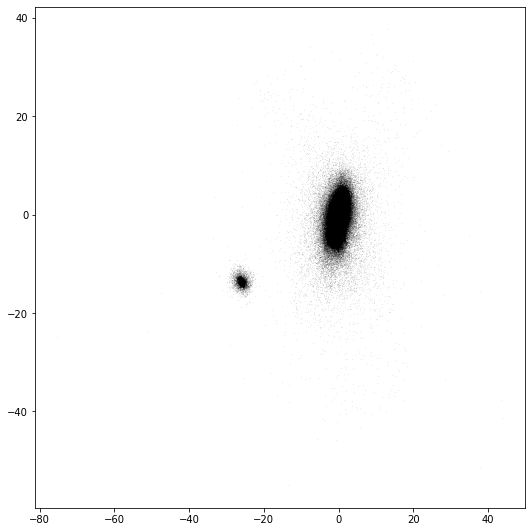

subhalo_127000000000021


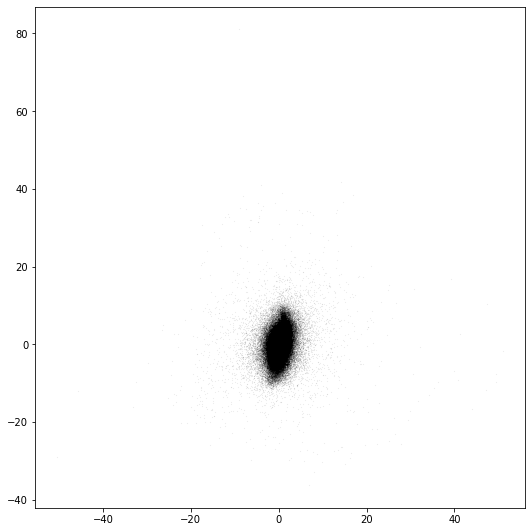

subhalo_127000000000023


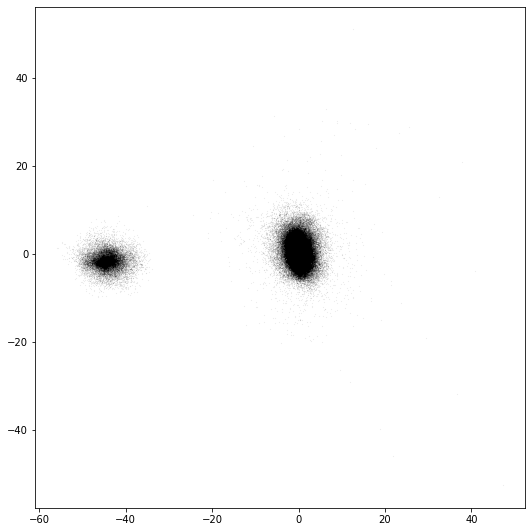

subhalo_127000000000028


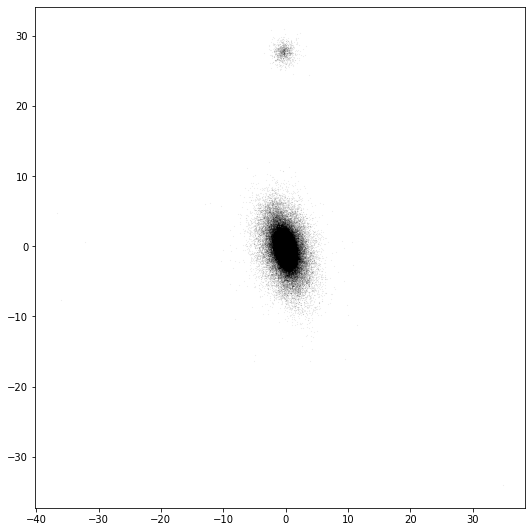

subhalo_127000000000031


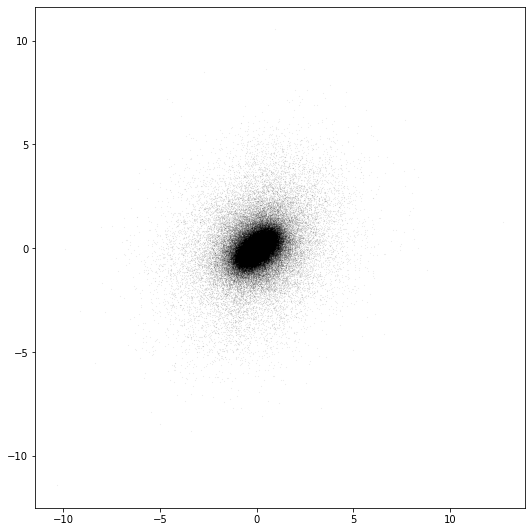

subhalo_127000000000030


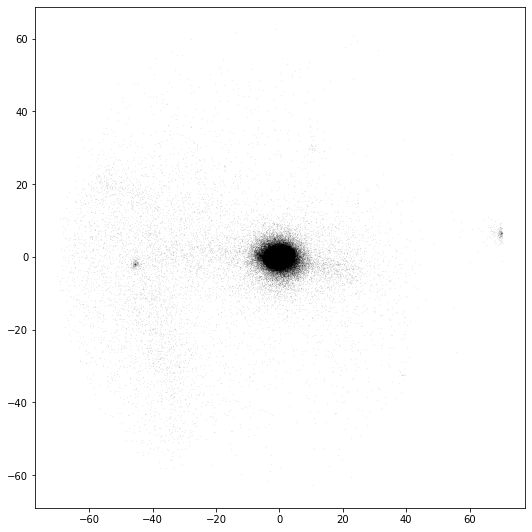

In [17]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np
import matplotlib.pyplot as plt

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

for i in range(15):
    snap = h5py.File('../_simulations/snap_127/subhalo_'+ str('%03d'% ID[i]) +'.h5py', 'r')
    
    pstr = snap['/Str/Coordinates'][()]
    
    print('subhalo_'+ str('%03d'% ID[i]) )

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)
    ax.plot(pstr[:,0],pstr[:,1],'.k',markersize=0.05)
    
    plt.show()

### Miro que tienen adentro los archivos

In [6]:
import h5py
snap = h5py.File('../_simulations/snap_127/subhalo_127000000000002.h5py', 'r')
snap.visit(print)

Center
Drk
Drk/Coordinates
Drk/IDs
Drk/Masses
Drk/Potential
Drk/Velocities
Gas
Gas/Coordinates
Gas/IDs
Gas/Masses
Gas/Metallicity
Gas/Potential
Gas/Total_Metallicity
Gas/Velocities
M200
Omega_0
Omega_Baryon
Omega_Lambda
R200
Redshift
Str
Str/Birth_Density
Str/Birth_Position
Str/Birth_Velocities
Str/Coordinates
Str/FormationTime
Str/IDs
Str/Masses
Str/Metallicity
Str/Potential
Str/Total_Metallicity
Str/Velocities
Time
h


### Grafico la posicion de los subhalos

In [74]:
%%time
import random

xstr = StrPos[:,0]
ystr = StrPos[:,1]
zstr = StrPos[:,2]
mask_str, = np.where((xstr<55) & (xstr>42) & (ystr<55) & (ystr>40) & (zstr<62) & (zstr>48))

xdrk = DrkPos[:,0]
ydrk = DrkPos[:,1]
zdrk = DrkPos[:,2]
mask_drk, = np.where((xdrk<55) & (xdrk>42) & (ydrk<55) & (ydrk>40) & (zdrk<62) & (zdrk>48))

adrk = random.choices(np.arange(len(xdrk[mask_drk])),k=np.int64(len(xdrk[mask_drk])*0.01)) 
astr = random.choices(np.arange(len(xstr[mask_str])),k=np.int64(len(xstr[mask_str])*0.01)) 

CPU times: user 10.3 s, sys: 1.41 s, total: 11.7 s
Wall time: 11.7 s


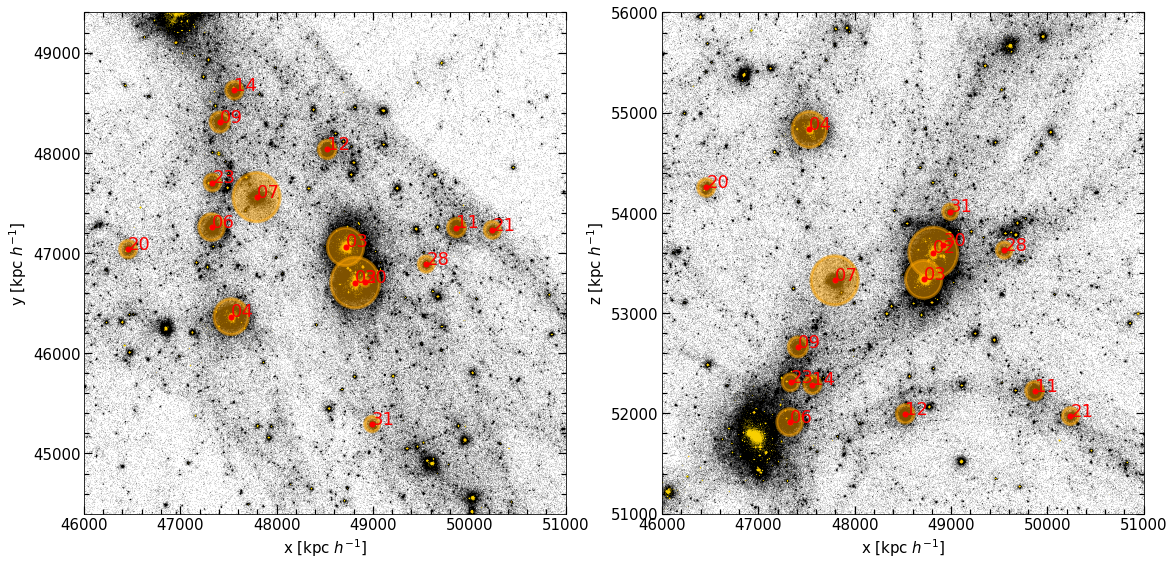

CPU times: user 10.6 s, sys: 1.34 s, total: 11.9 s
Wall time: 12 s


In [99]:
%%time 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.subplots_adjust(bottom=0.10, left =0.05, right = 0.97, top = 0.97)

ax[0].plot(xdrk[mask_drk][adrk]*1000,ydrk[mask_drk][adrk]*1000,'.k',markersize=0.1,alpha=0.7)
ax[0].plot(xstr[mask_str][astr]*1000,ystr[mask_str][astr]*1000,'.',color='gold',markersize=0.1)
ax[0].set_xlim(46000,51000)
ax[0].set_ylim(44400,49400)
ax[0].set_xlabel('x [kpc $h^{-1}$]',fontsize=15)
ax[0].set_ylabel('y [kpc $h^{-1}$]',fontsize=15)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=15)
ax[0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

for j in range(15):
    Idd = ''
    for aux in list(str('%d'%Id[j]))[-2:]:
        Idd += aux
    circle1= plt.Circle((Xcen[j],Ycen[j]),radius=Rvir[j],lw=3,ls='-',color='orange',alpha=0.5,zorder=50)
    circle2= plt.Circle((Xcen[j],Zcen[j]),radius=Rvir[j],lw=3,ls='-',color='orange',alpha=0.5,zorder=50)
    # if (j == 0 or j==14):
    ax[0].text(Xcen[j],Ycen[j],str('%s'%Idd),fontsize=18,color='r',zorder=100)
    ax[1].text(Xcen[j],Zcen[j],str('%s'%Idd),fontsize=18,color='r',zorder=100)
    ax[0].add_artist(circle1)
    ax[1].add_artist(circle2)
    ax[0].plot(Xcen[j],Ycen[j],'ro',ms=5,zorder=100)
    ax[1].plot(Xcen[j],Zcen[j],'ro',ms=5,zorder=100)
# #     ax.text(G_Pos[i,0],G_Pos[i,1],str('%s'%i),fontsize=18,color='b')
    
#     

ax[1].plot(xdrk[mask_drk][adrk]*1000,zdrk[mask_drk][adrk]*1000,'.k',markersize=0.1,alpha=0.7)
ax[1].plot(xstr[mask_str][astr]*1000,zstr[mask_str][astr]*1000,'.',color='gold',markersize=0.1)
ax[1].set_xlabel('x [kpc $h^{-1}$]',fontsize=15)
ax[1].set_ylabel('z [kpc $h^{-1}$]',fontsize=15)
ax[1].set_xlim(46000,51000)
ax[1].set_ylim(51000,56000)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=15)
ax[1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

plt.show()
# fig.savefig('../_imagenes/subhalos.png', dpi = 100, xxbox_inches='tight')